# Day 5: Matplotlib/Seaborn基礎（データ可視化）- 初心者向け

## 今日の目標
- グラフの基本的な作り方を理解する
- よく使うグラフ（折れ線、棒、散布図、円）を作れるようになる
- グラフの見た目を調整できるようになる

## なぜデータ可視化が重要？
- 数字だけでは分かりにくいパターンや傾向が見える
- プレゼンテーションで説得力が増す
- データの異常値や外れ値を発見しやすい

## 1. 必要なライブラリのインポート

In [4]:
# データ可視化用のライブラリ
import matplotlib.pyplot as plt  # グラフ作成の基本ライブラリ
import seaborn as sns          # より美しいグラフを簡単に作れるライブラリ

# データ処理用のライブラリ
import pandas as pd
import numpy as np

# matplotlibの日本語化対応
from matplotlib import rcParams
import matplotlib.font_manager as fm

# 利用可能なフォントを確認
available_fonts = [f.name for f in fm.fontManager.ttflist]
print("システムフォント数:", len(available_fonts))

# 日本語フォントを探す
japanese_fonts = []
for font_name in ['Hiragino Sans', 'Hiragino Kaku Gothic ProN', 'Hiragino Maru Gothic Pro', 
                  'Yu Gothic', 'Osaka', 'Meiryo', 'MS Gothic', 'Arial Unicode MS']:
    if font_name in available_fonts:
        japanese_fonts.append(font_name)
        print(f"✓ {font_name} が見つかりました")

if japanese_fonts:
    # 最初に見つかった日本語フォントを使用
    rcParams['font.family'] = japanese_fonts[0]
    print(f"\n使用フォント: {japanese_fonts[0]}")
else:
    print("\n警告: 日本語フォントが見つかりません")
    # フォントキャッシュをリビルド
    print("フォントキャッシュを更新中...")
    fm._rebuild()
    
# マイナス記号の表示設定
rcParams['axes.unicode_minus'] = False

# グラフのスタイル設定
sns.set_style("whitegrid")  # 白い背景に薄いグリッド線

print("\nライブラリの読み込み完了！")

システムフォント数: 534
✓ Hiragino Sans が見つかりました
✓ Hiragino Maru Gothic Pro が見つかりました
✓ Osaka が見つかりました
✓ Arial Unicode MS が見つかりました

使用フォント: Hiragino Sans

ライブラリの読み込み完了！


/var/folders/fq/4y03msy94bq1kmg1wt7jjxxr0000gn/T/ipykernel_51614/3593174262.py:21: UserWarning: Glyph 12501 (\N{KATAKANA LETTER HU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/fq/4y03msy94bq1kmg1wt7jjxxr0000gn/T/ipykernel_51614/3593174262.py:21: UserWarning: Glyph 12457 (\N{KATAKANA LETTER SMALL O}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/fq/4y03msy94bq1kmg1wt7jjxxr0000gn/T/ipykernel_51614/3593174262.py:21: UserWarning: Glyph 12531 (\N{KATAKANA LETTER N}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/fq/4y03msy94bq1kmg1wt7jjxxr0000gn/T/ipykernel_51614/3593174262.py:21: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/fq/4y03msy94bq1kmg1wt7jjxxr0000gn/T/ipykernel_51614/3593174262.py:21: UserWarning: Glyph 12486 (\N{KATAKANA LETTER TE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/fq/4y03msy94bq1kmg1wt7jjxxr0000gn/T/ipykernel_51614/3593174262.py:21: Use

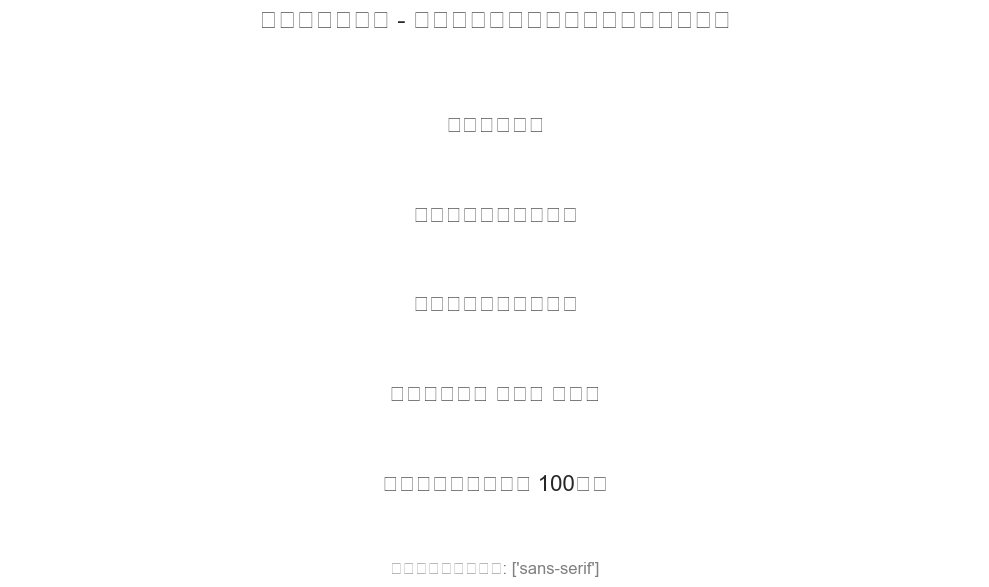


直接フォント指定でのテスト:
見つかった日本語フォント: 24個
  - Hiragino Sans
  - Hiragino Sans
  - Hiragino Sans CNS


In [5]:
# フォント設定のテスト
fig, ax = plt.subplots(figsize=(10, 6))

# テスト用のテキストを配置
test_texts = [
    ('日本語テスト', 0.5, 0.8),
    ('ひらがな：あいうえお', 0.5, 0.6),
    ('カタカナ：アイウエオ', 0.5, 0.4),
    ('漢字：月曜日 火曜日 水曜日', 0.5, 0.2),
    ('混在：コーヒー売上 100万円', 0.5, 0.0)
]

for text, x, y in test_texts:
    ax.text(x, y, text, fontsize=16, ha='center', va='center', 
            transform=ax.transAxes)

ax.set_title('フォントテスト - 日本語が正しく表示されていますか？', fontsize=18)
ax.text(0.5, -0.2, f'現在のフォント設定: {rcParams["font.family"]}', 
        fontsize=12, ha='center', transform=ax.transAxes, color='gray')
ax.axis('off')
plt.tight_layout()
plt.show()

# 別の方法: 直接フォントを指定してテスト
print("\n直接フォント指定でのテスト:")
from matplotlib import font_manager

# 日本語フォントのパスを探す
font_paths = []
for font in fm.fontManager.ttflist:
    if any(jp in font.name for jp in ['Hiragino', 'Yu', 'Osaka', 'Meiryo']):
        font_paths.append((font.name, font.fname))
        
if font_paths:
    print(f"見つかった日本語フォント: {len(font_paths)}個")
    for name, path in font_paths[:3]:  # 最初の3つだけ表示
        print(f"  - {name}")
else:
    print("日本語フォントが見つかりません。japanize-matplotlibのインストールを推奨します。")

## 2. 練習用データの準備
まずは、簡単なデータを作って練習しましょう。

## 日本語フォントの設定確認

もし上記のテストで日本語が正しく表示されない場合は、以下のいずれかの方法を試してください：

### 方法1: japanize-matplotlibをインストール（推奨）
```bash
pip install japanize-matplotlib
```

その後、以下のコードを実行：
```python
import japanize_matplotlib
```

### 方法2: フォントを手動で設定
以下のセルで、お使いの環境に合わせたフォント設定を行います。

In [8]:
import japanize_matplotlib

In [9]:
# 方法1: japanize-matplotlibを使う場合（コメントを外して実行）
# import japanize_matplotlib

# 方法2: 手動でフォントを設定する場合
import platform
import matplotlib.pyplot as plt
from matplotlib import rcParams

if platform.system() == 'Darwin':  # macOS
    # macOSで一般的な日本語フォント
    font_candidates = [
        'Hiragino Sans',
        'Hiragino Kaku Gothic ProN', 
        'Hiragino Maru Gothic ProN',
        'Hiragino Mincho ProN',
        'Yu Gothic',
        'Osaka',
        'Arial Unicode MS',
        'AppleGothic'
    ]
    
    # 利用可能なフォントを探す
    from matplotlib import font_manager as fm
    available = set(f.name for f in fm.fontManager.ttflist)
    
    for font in font_candidates:
        if font in available:
            plt.rcParams['font.family'] = font
            print(f"フォント '{font}' を設定しました")
            break
    else:
        print("警告: 日本語フォントが見つかりません")
        print("japanize-matplotlibのインストールを推奨します:")
        print("pip install japanize-matplotlib")
        
elif platform.system() == 'Windows':
    plt.rcParams['font.family'] = 'Yu Gothic'
else:  # Linux
    plt.rcParams['font.family'] = 'Noto Sans CJK JP'

# マイナス記号の文字化けを防ぐ
plt.rcParams['axes.unicode_minus'] = False

print(f"現在のフォント設定: {plt.rcParams['font.family']}")

フォント 'Hiragino Sans' を設定しました
現在のフォント設定: ['Hiragino Sans']


In [10]:
# 売上データの例（カフェの月別売上）
months = ['1月', '2月', '3月', '4月', '5月', '6月']
coffee_sales = [250, 280, 320, 340, 380, 420]  # コーヒーの売上（万円）
cake_sales = [180, 200, 240, 260, 300, 340]    # ケーキの売上（万円）

# DataFrameにまとめる
sales_df = pd.DataFrame({
    '月': months,
    'コーヒー': coffee_sales,
    'ケーキ': cake_sales
})

print("売上データ:")
print(sales_df)

売上データ:
    月  コーヒー  ケーキ
0  1月   250  180
1  2月   280  200
2  3月   320  240
3  4月   340  260
4  5月   380  300
5  6月   420  340


## 3. 基本的なグラフの作成

### 3.1 折れ線グラフ（推移を見る）

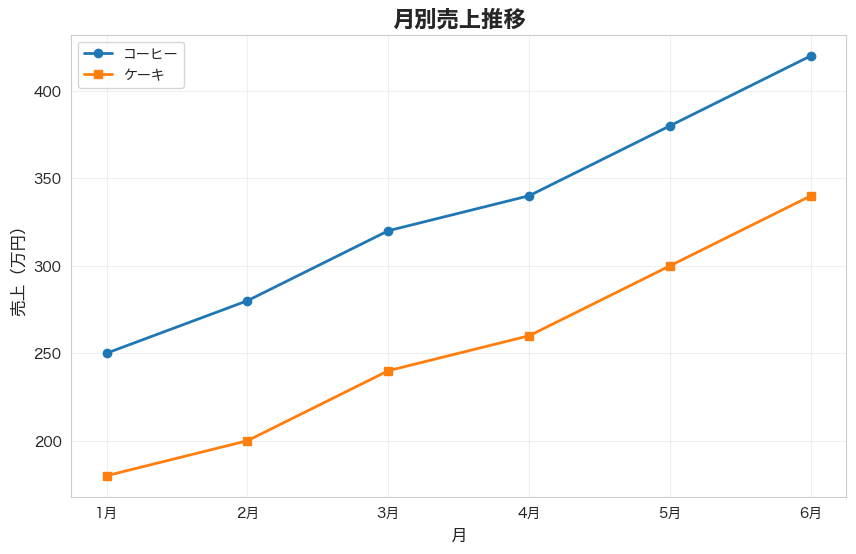

In [11]:
# 最もシンプルな折れ線グラフ
plt.figure(figsize=(10, 6))  # グラフのサイズ設定（横10、縦6）

# 折れ線を描く
plt.plot(months, coffee_sales, marker='o', label='コーヒー', linewidth=2)
plt.plot(months, cake_sales, marker='s', label='ケーキ', linewidth=2)

# グラフの装飾
plt.title('月別売上推移', fontsize=16, fontweight='bold')
plt.xlabel('月', fontsize=12)
plt.ylabel('売上（万円）', fontsize=12)
plt.legend()  # 凡例を表示
plt.grid(True, alpha=0.3)  # グリッド線を薄く表示

plt.show()

### 3.2 棒グラフ（比較する）

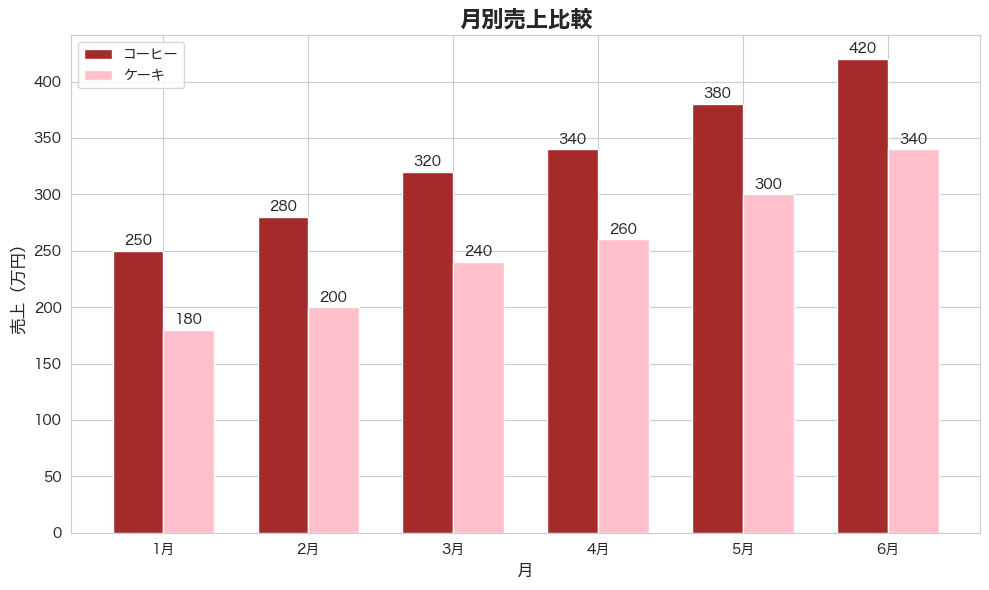

In [12]:
# 並べて比較する棒グラフ
plt.figure(figsize=(10, 6))

# x軸の位置を計算
x = np.arange(len(months))  # [0, 1, 2, 3, 4, 5]
width = 0.35  # 棒の幅

# 棒グラフを描く
plt.bar(x - width/2, coffee_sales, width, label='コーヒー', color='brown')
plt.bar(x + width/2, cake_sales, width, label='ケーキ', color='pink')

# グラフの装飾
plt.title('月別売上比較', fontsize=16, fontweight='bold')
plt.xlabel('月', fontsize=12)
plt.ylabel('売上（万円）', fontsize=12)
plt.xticks(x, months)  # x軸のラベルを設定
plt.legend()

# 値を棒の上に表示
for i, (c, k) in enumerate(zip(coffee_sales, cake_sales)):
    plt.text(i - width/2, c + 5, str(c), ha='center')
    plt.text(i + width/2, k + 5, str(k), ha='center')

plt.tight_layout()
plt.show()

### 3.3 円グラフ（割合を見る）

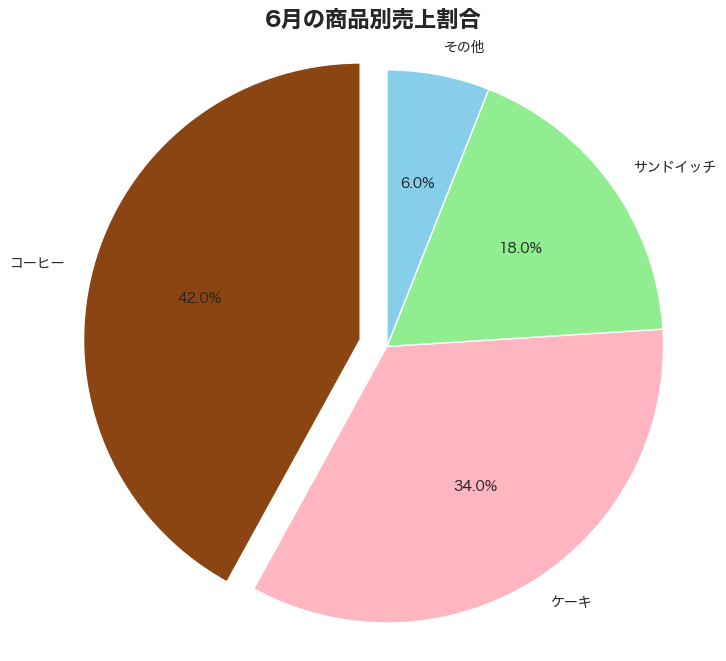

In [13]:
# 6月の商品別売上割合
june_sales = {
    'コーヒー': 420,
    'ケーキ': 340,
    'サンドイッチ': 180,
    'その他': 60
}

plt.figure(figsize=(8, 8))

# 円グラフを描く
colors = ['#8B4513', '#FFB6C1', '#90EE90', '#87CEEB']  # 色の指定
plt.pie(june_sales.values(), 
        labels=june_sales.keys(),
        autopct='%1.1f%%',  # パーセント表示
        colors=colors,
        startangle=90,      # 開始角度
        explode=(0.1, 0, 0, 0))  # コーヒーを少し離して強調

plt.title('6月の商品別売上割合', fontsize=16, fontweight='bold')
plt.axis('equal')  # 円を正円にする
plt.show()

### 3.4 散布図（相関を見る）

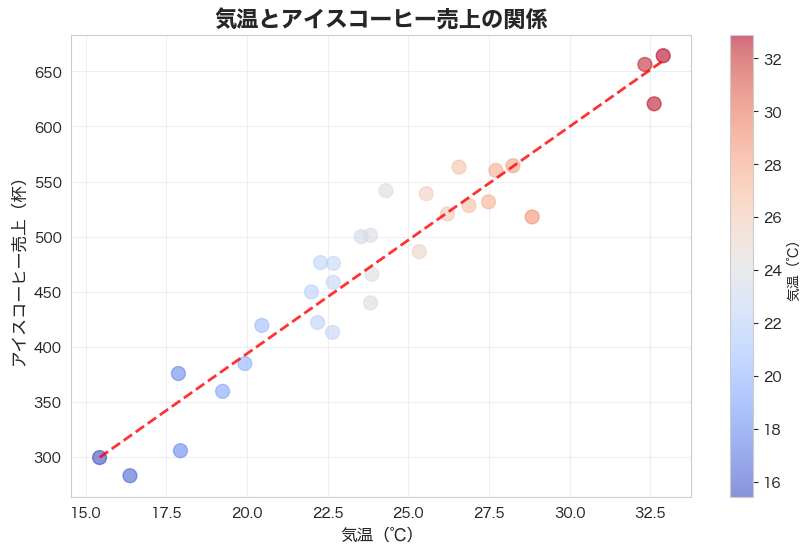

In [14]:
# 気温と売上の関係を見る
np.random.seed(42)  # 乱数のシードを固定

# データの生成（30日分）
temperature = np.random.normal(25, 5, 30)  # 平均25度、標準偏差5度
ice_coffee_sales = 20 * temperature + np.random.normal(0, 30, 30)  # 気温に比例 + ノイズ

plt.figure(figsize=(10, 6))

# 散布図を描く
plt.scatter(temperature, ice_coffee_sales, 
           s=100,           # 点のサイズ
           alpha=0.6,       # 透明度
           c=temperature,   # 色を温度に応じて変える
           cmap='coolwarm') # カラーマップ

# グラフの装飾
plt.title('気温とアイスコーヒー売上の関係', fontsize=16, fontweight='bold')
plt.xlabel('気温（℃）', fontsize=12)
plt.ylabel('アイスコーヒー売上（杯）', fontsize=12)
plt.colorbar(label='気温（℃）')

# トレンドラインを追加
z = np.polyfit(temperature, ice_coffee_sales, 1)  # 1次の多項式でフィット
p = np.poly1d(z)
plt.plot(sorted(temperature), p(sorted(temperature)), "r--", alpha=0.8, linewidth=2)

plt.grid(True, alpha=0.3)
plt.show()

## 4. Seabornで美しいグラフを簡単に作る

Seabornを使うと、より洗練されたグラフが簡単に作れます。

In [21]:
# より詳細なデータを作成
np.random.seed(42)
days = 100

# データの生成
data = pd.DataFrame({
    '日付': pd.date_range('2024-01-01', periods=days),
    '気温': np.random.normal(20, 8, days),
    'コーヒー売上': np.random.normal(300, 50, days),
    'ケーキ売上': np.random.normal(200, 40, days),
})

# 曜日を追加
data['曜日'] = data['日付'].dt.day_name()
data['曜日_日本語'] = data['曜日'].map({
    'Monday': '月曜日', 'Tuesday': '火曜日', 'Wednesday': '水曜日',
    'Thursday': '木曜日', 'Friday': '金曜日', 'Saturday': '土曜日', 'Sunday': '日曜日'
})

### 4.1 箱ひげ図（分布を比較）

/var/folders/fq/4y03msy94bq1kmg1wt7jjxxr0000gn/T/ipykernel_51614/3220221854.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='曜日_日本語', y='コーヒー売上',


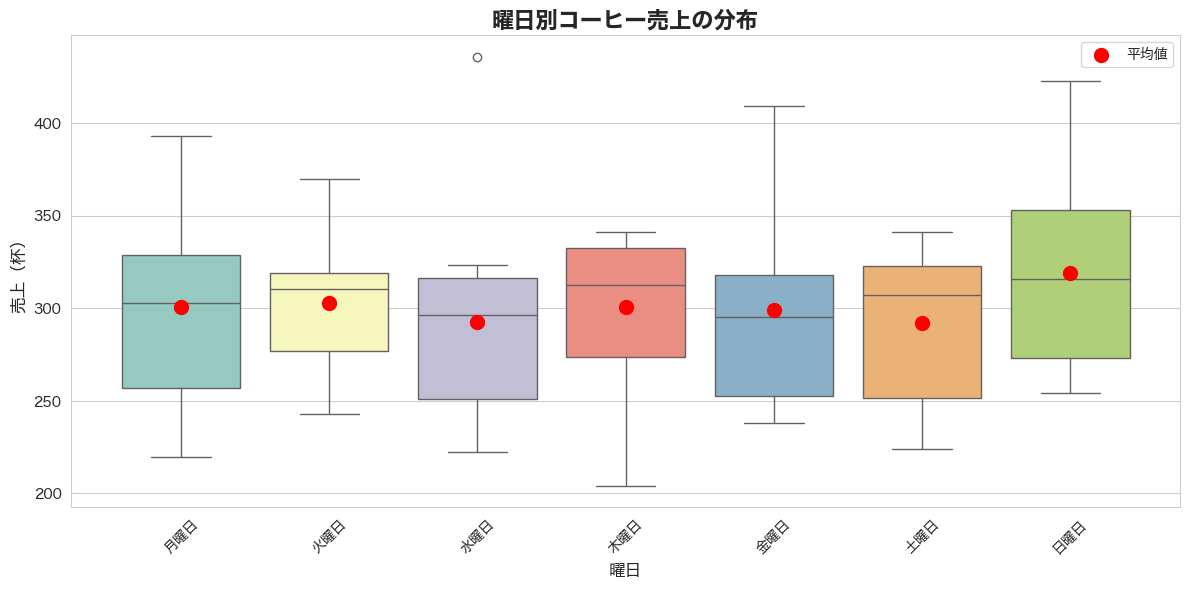

In [18]:
plt.figure(figsize=(12, 6))

# 曜日別のコーヒー売上を箱ひげ図で表示
sns.boxplot(data=data, x='曜日_日本語', y='コーヒー売上', 
           order=['月曜日', '火曜日', '水曜日', '木曜日', '金曜日', '土曜日', '日曜日'],
           palette='Set3')

plt.title('曜日別コーヒー売上の分布', fontsize=16, fontweight='bold')
plt.xlabel('曜日', fontsize=12)
plt.ylabel('売上（杯）', fontsize=12)
plt.xticks(rotation=45)

# 平均値を赤い点で表示
means = data.groupby('曜日_日本語')['コーヒー売上'].mean()
positions = range(len(means))
plt.scatter(positions, means[['月曜日', '火曜日', '水曜日', '木曜日', '金曜日', '土曜日', '日曜日']], 
           color='red', s=100, zorder=3, label='平均値')

plt.legend()
plt.tight_layout()
plt.show()

### 4.2 ヒートマップ（相関関係を一目で）

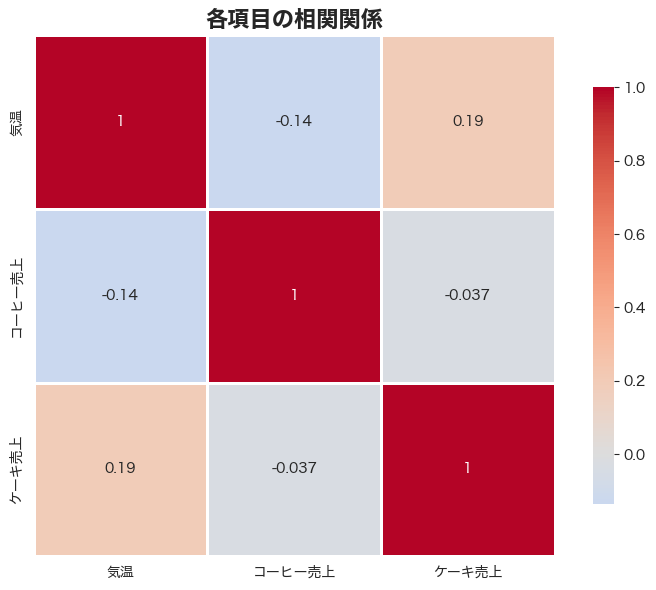

In [22]:
# 相関係数を計算
correlation = data[['気温', 'コーヒー売上', 'ケーキ売上']].corr()

plt.figure(figsize=(8, 6))

# ヒートマップを描く
sns.heatmap(correlation, 
           annot=True,      # 数値を表示
           cmap='coolwarm', # カラーマップ
           center=0,        # 中心値
           square=True,     # 正方形のセル
           linewidths=1,    # セルの境界線
           cbar_kws={"shrink": 0.8})

plt.title('各項目の相関関係', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 5. 実践練習問題

### 練習1: 月別売上の積み上げ棒グラフ

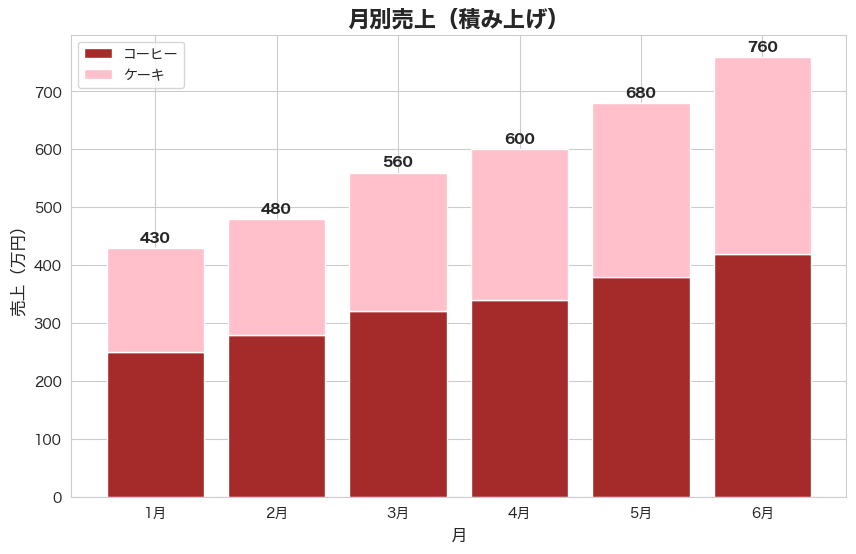

In [26]:
# TODO: 月別のコーヒーとケーキの売上を積み上げ棒グラフで表示してください
# ヒント: plt.bar()を2回使い、2回目はbottom=を指定します

plt.figure(figsize=(10, 6))

x = np.arange(len(months))
plt.bar(x, coffee_sales, label='コーヒー', color='brown')
plt.bar(x, cake_sales, bottom=coffee_sales, label='ケーキ', color='pink')

plt.title('月別売上（積み上げ）', fontsize=16, fontweight='bold')
plt.xlabel('月', fontsize=12)
plt.ylabel('売上（万円）', fontsize=12)
plt.xticks(x, months)
plt.legend()

# 合計値を表示
for i, (c, k) in enumerate(zip(coffee_sales, cake_sales)):
    plt.text(i, c + k + 10, str(c + k), ha='center', fontweight='bold')


plt.show()

### 練習2: 2つのグラフを並べて表示

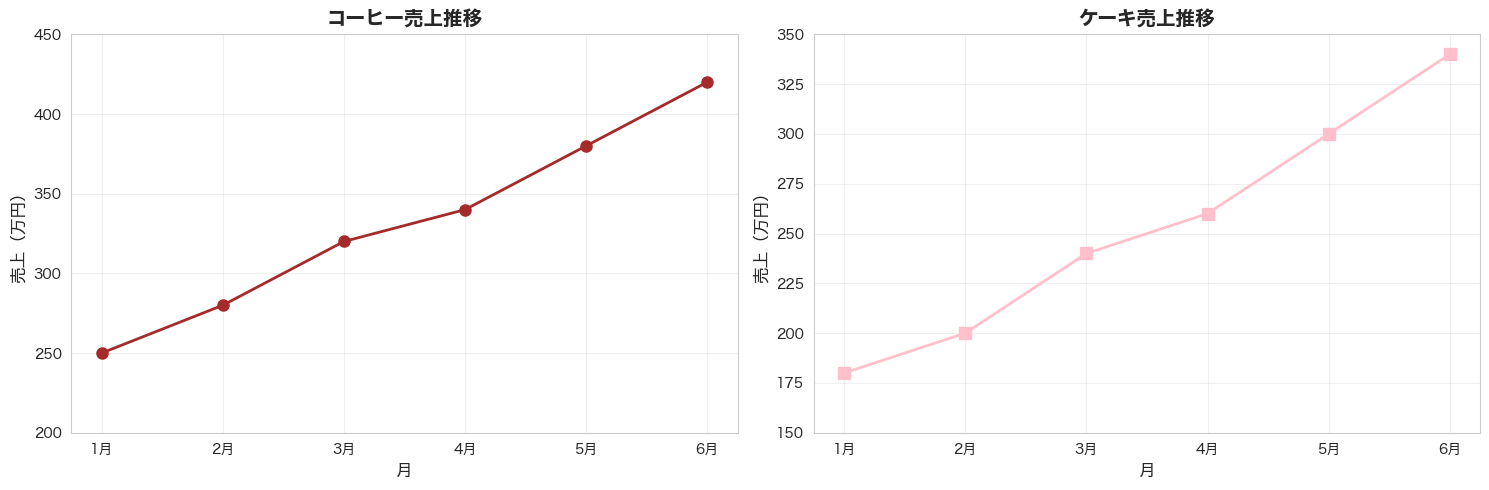

In [27]:
# TODO: 左にコーヒーの折れ線グラフ、右にケーキの折れ線グラフを表示
# ヒント: plt.subplot(1, 2, 1)とplt.subplot(1, 2, 2)を使います

plt.figure(figsize=(15, 5))

# 左側のグラフ
plt.subplot(1, 2, 1)
plt.subplot(1, 2, 1)
plt.plot(months, coffee_sales, marker='o', color='brown', linewidth=2, markersize=8)
plt.title('コーヒー売上推移', fontsize=14, fontweight='bold')
plt.xlabel('月', fontsize=12)
plt.ylabel('売上（万円）', fontsize=12)
plt.grid(True, alpha=0.3)
plt.ylim(200, 450)


# 右側のグラフ
plt.subplot(1, 2, 2)
plt.subplot(1, 2, 2)
plt.plot(months, cake_sales, marker='s', color='pink', linewidth=2, markersize=8)
plt.title('ケーキ売上推移', fontsize=14, fontweight='bold')
plt.xlabel('月', fontsize=12)
plt.ylabel('売上（万円）', fontsize=12)
plt.grid(True, alpha=0.3)
plt.ylim(150, 350)



plt.tight_layout()
plt.show()

## 6. グラフ作成のコツとまとめ

### 良いグラフを作るためのポイント
1. **適切なグラフの種類を選ぶ**
   - 推移 → 折れ線グラフ
   - 比較 → 棒グラフ
   - 割合 → 円グラフ
   - 相関 → 散布図

2. **見やすさを重視**
   - タイトルと軸ラベルは必須
   - 色は見やすく、多すぎない
   - フォントサイズは適切に

3. **情報を詰め込みすぎない**
   - 1つのグラフに1つのメッセージ
   - 必要に応じて複数のグラフに分ける

### 解答例

In [ ]:
# 練習1の解答: 積み上げ棒グラフ
plt.figure(figsize=(10, 6))

x = np.arange(len(months))
plt.bar(x, coffee_sales, label='コーヒー', color='brown')
plt.bar(x, cake_sales, bottom=coffee_sales, label='ケーキ', color='pink')

plt.title('月別売上（積み上げ）', fontsize=16, fontweight='bold')
plt.xlabel('月', fontsize=12)
plt.ylabel('売上（万円）', fontsize=12)
plt.xticks(x, months)
plt.legend()

# 合計値を表示
for i, (c, k) in enumerate(zip(coffee_sales, cake_sales)):
    plt.text(i, c + k + 10, str(c + k), ha='center', fontweight='bold')

plt.show()

In [ ]:
# 練習2の解答: 2つのグラフを並べる
plt.figure(figsize=(15, 5))

# 左側: コーヒーの売上推移
plt.subplot(1, 2, 1)
plt.plot(months, coffee_sales, marker='o', color='brown', linewidth=2, markersize=8)
plt.title('コーヒー売上推移', fontsize=14, fontweight='bold')
plt.xlabel('月', fontsize=12)
plt.ylabel('売上（万円）', fontsize=12)
plt.grid(True, alpha=0.3)
plt.ylim(200, 450)

# 右側: ケーキの売上推移
plt.subplot(1, 2, 2)
plt.plot(months, cake_sales, marker='s', color='pink', linewidth=2, markersize=8)
plt.title('ケーキ売上推移', fontsize=14, fontweight='bold')
plt.xlabel('月', fontsize=12)
plt.ylabel('売上（万円）', fontsize=12)
plt.grid(True, alpha=0.3)
plt.ylim(150, 350)

plt.tight_layout()
plt.show()

## お疲れ様でした！

今日はデータ可視化の基本を学びました。
グラフを作ることで、データの意味がより明確になることを実感できたと思います。

### 次のステップ
- より複雑なグラフ（3D、アニメーション）に挑戦
- 実際のデータセットでグラフを作成
- ダッシュボードの作成（複数のグラフを組み合わせる）